Saving EEG data - Sheet1.csv to EEG data - Sheet1.csv

Logistic Regression Results:
Accuracy: 0.625
Precision: 0.6
Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.50      0.57         4
           1       0.60      0.75      0.67         4

    accuracy                           0.62         8
   macro avg       0.63      0.62      0.62         8
weighted avg       0.63      0.62      0.62         8



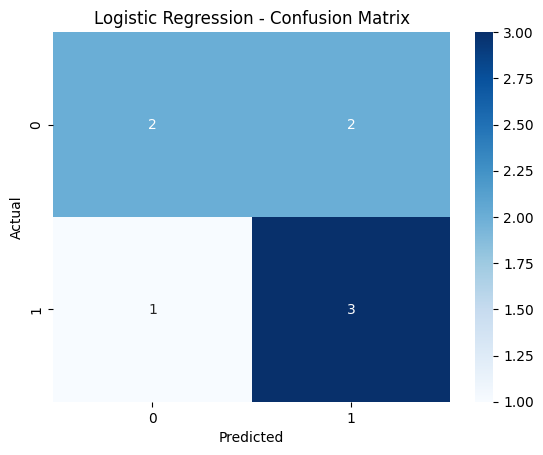


SVM (Linear Kernel) Results:
Accuracy: 0.75
Precision: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.75      0.75      0.75         4

    accuracy                           0.75         8
   macro avg       0.75      0.75      0.75         8
weighted avg       0.75      0.75      0.75         8



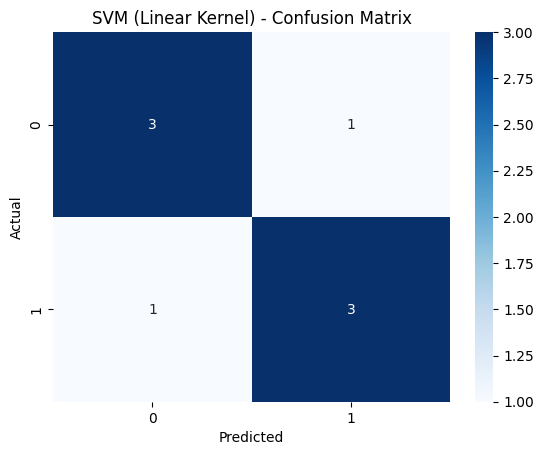


SVM (RBF Kernel) Results:
Accuracy: 0.375
Precision: 0.3333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.40      0.50      0.44         4
           1       0.33      0.25      0.29         4

    accuracy                           0.38         8
   macro avg       0.37      0.38      0.37         8
weighted avg       0.37      0.38      0.37         8



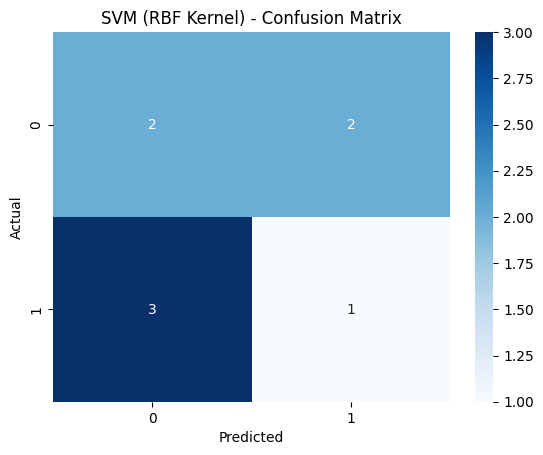


k-Nearest Neighbors (k=5) Results:
Accuracy: 0.25
Precision: 0.3333333333333333
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         4
           1       0.33      0.50      0.40         4

    accuracy                           0.25         8
   macro avg       0.17      0.25      0.20         8
weighted avg       0.17      0.25      0.20         8



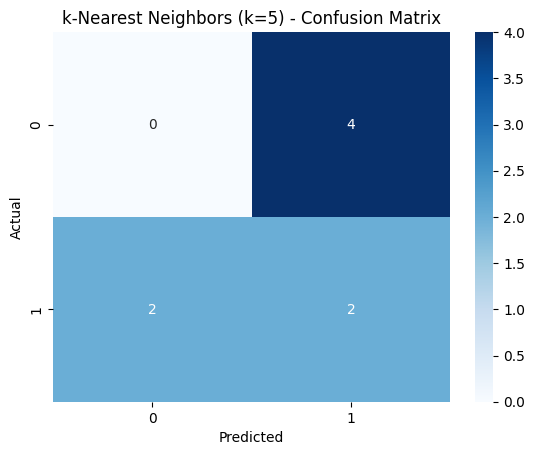

In [1]:
# It contains:
# Logistic Regression
# SVM (Linear and RBF kernels)
# kNN (k=5)
# Accuracy, precision, and classification reports
# Confusion matrix heatmap

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from google.colab import files
uploaded = files.upload()

import pandas as pd
df = pd.read_csv('EEG data - Sheet1.csv')

# Separate features and target
y = df.iloc[:, -1]  # Last column as target
X = df.iloc[:, :-1]  # All columns except last as features

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)


# Helper function to evaluate models
def evaluate_model(name, model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)

    print(f"\n{name} Results:")
    print("Accuracy:", acc)
    print("Precision:", prec)
    print("Classification Report:\n", classification_report(y_test, y_pred))

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    return acc, prec

# Logistic Regression
logreg = LogisticRegression(max_iter=1000)
logreg_acc, logreg_prec = evaluate_model("Logistic Regression", logreg, X_train, y_train, X_test, y_test)

# SVM - Linear Kernel
svm_linear = SVC(kernel='linear')
svm_linear_acc, svm_linear_prec = evaluate_model("SVM (Linear Kernel)", svm_linear, X_train, y_train, X_test, y_test)

# SVM - RBF Kernel
svm_rbf = SVC(kernel='rbf')
svm_rbf_acc, svm_rbf_prec = evaluate_model("SVM (RBF Kernel)", svm_rbf, X_train, y_train, X_test, y_test)

# k-Nearest Neighbors (k=5)
knn = KNeighborsClassifier(n_neighbors=5)
knn_acc, knn_prec = evaluate_model("k-Nearest Neighbors (k=5)", knn, X_train, y_train, X_test, y_test)


In [2]:
#Comparing all algorithms in terms of precision and accuracy and visualizing the result with the help of bar chart differentiation.


SVM (Linear Kernel) Results:
Accuracy: 0.75
Precision: 0.75
Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.75      0.75         4
           1       0.75      0.75      0.75         4

    accuracy                           0.75         8
   macro avg       0.75      0.75      0.75         8
weighted avg       0.75      0.75      0.75         8



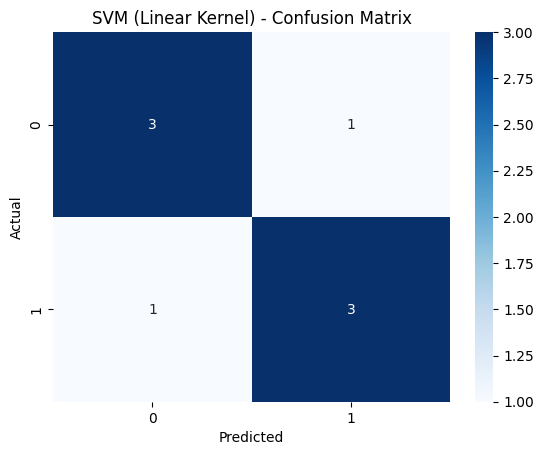

Model Comparison:
                 Model  Accuracy  Precision
0  Logistic Regression     0.625   0.600000
1         SVM (Linear)     0.750   0.750000
2            SVM (RBF)     0.375   0.333333
3           k-NN (k=5)     0.250   0.333333


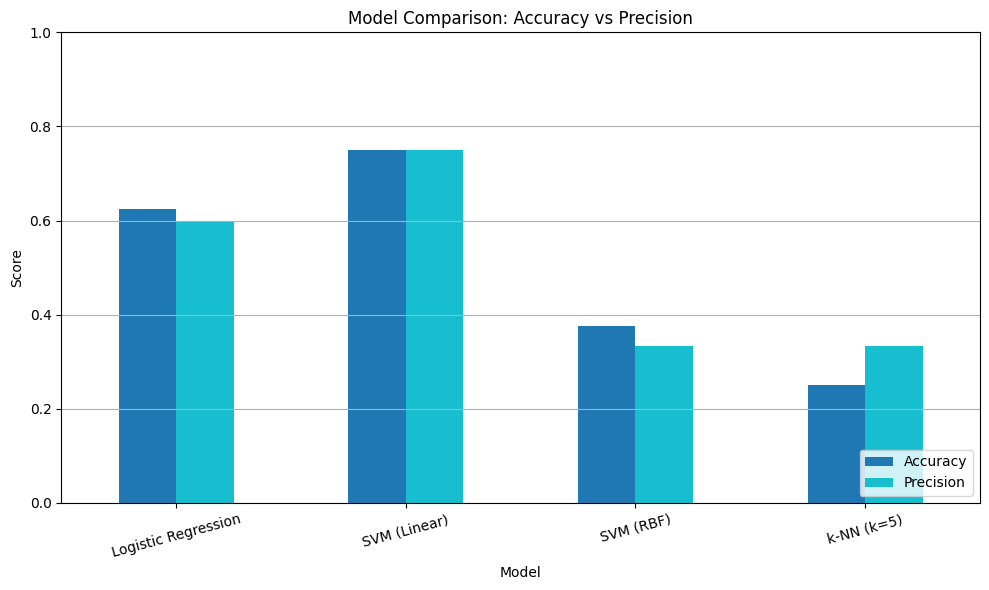

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
# SVM - Linear Kernel
svm_lin = SVC(kernel='linear')
svm_lin_acc, svm_lin_prec = evaluate_model("SVM (Linear Kernel)", svm_lin, X_train, y_train, X_test, y_test)


# Dictionary to store results
results = {
    "Model": ["Logistic Regression", "SVM (Linear)", "SVM (RBF)", "k-NN (k=5)"],
    "Accuracy": [logreg_acc, svm_lin_acc, svm_rbf_acc, knn_acc],
    "Precision": [logreg_prec, svm_lin_prec, svm_rbf_prec, knn_prec]
}

# Create a DataFrame
results_df = pd.DataFrame(results)

# Display the results
print("Model Comparison:")
print(results_df)

# Plot the comparison
results_df.set_index("Model").plot(kind='bar', figsize=(10, 6), colormap="tab10")
plt.title("Model Comparison: Accuracy vs Precision")
plt.ylabel("Score")
plt.ylim(0, 1)
plt.grid(axis='y')
plt.xticks(rotation=15)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()


In [4]:
#Task-2:

#Identify top 5 features for classification using univariate feature selection (UFS), RFE, and PCA.
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import pandas as pd
import numpy as np


In [5]:
#1.Univariate feature selection:
# UFS: Select top 5 using ANOVA F-test
ufs_selector = SelectKBest(score_func=f_classif, k=5)
ufs_selector.fit(X, y)

ufs_selected_indices = ufs_selector.get_support(indices=True)
ufs_top_features = X.columns[ufs_selected_indices]
print("Top 5 features using UFS:", ufs_top_features.tolist())


Top 5 features using UFS: ['Unnamed: 0', 'beta23', 'delta41', 'delta51', 'theta23']


In [6]:
#2. Recursive Feature Elimination (RFE)
# RFE: Recursive Feature Elimination
model = LogisticRegression(max_iter=1000)
rfe_selector = RFE(model, n_features_to_select=5)
rfe_selector.fit(X, y)

rfe_selected_indices = rfe_selector.get_support(indices=True)
rfe_top_features = X.columns[rfe_selected_indices]
print("Top 5 features using RFE:", rfe_top_features.tolist())


Top 5 features using RFE: ['Unnamed: 0', 'alpha8', 'alpha56', 'beta35', 'theta29']


In [7]:
#3. Principal Component Analysis (PCA)
# PCA: Principal Component Analysis (unsupervised)
pca = PCA(n_components=5)
pca.fit(X)

# Top contributing features per component (we sum absolute values to rank)
components = np.abs(pca.components_)
feature_importance = components.sum(axis=0)

# Get top 5 original features
pca_top_indices = np.argsort(feature_importance)[::-1][:5]
pca_top_features = X.columns[pca_top_indices]
print("Top 5 features using PCA:", pca_top_features.tolist())


Top 5 features using PCA: ['delta10', 'delta23', 'delta55', 'delta17', 'delta52']


Quick Explanation: Why feature selection results may or may not be the same across UFS, RFE, and PCA

1.Univariate Feature Selection (UFS)

What it does: Selects features based on statistical tests (e.g., ANOVA, chi-square) independently.

How it ranks: Based on individual correlation with the target variable.
Focuses only on each feature's own predictive power.

2.Recursive Feature Elimination (RFE)

What it does: Uses a model (e.g., Logistic Regression or SVM) to rank features based on how well they improve model performance.

How it ranks: Considers combinations and interactions between features.
Captures multivariate relationships.

3.Principal Component Analysis (PCA)

What it does: Reduces dimensionality by creating new features (principal components) that capture maximum variance in the data.

How it ranks: Based on variance, not target prediction.
It doesn’t care about the target label at all (i.e., unsupervised).

So, will they give the same top 5 features?
Probably not the same, because:

UFS only looks at individual predictive power.

RFE looks at combined effect in model context.

PCA is unsupervised and only cares about variance, not classification accuracy.